In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt  

sb.set()  # set the default Seaborn style for graphics

## Problem Definition

**These days, a lot of tourists consider booking AirBnB over hotels because it tends to be more affordable and a more immersive experience. However, there are often many different listings available with a wide variety of features and a large range of prices. How can a tourist know what is a good price for a listing with the requirements they need? Through this project, we intend to find out what the price of an AirBnB would be based on its features, for example person capacity.**

In [2]:
londonData = pd.read_csv("london_weekdays.csv")

**realSum:** The total price of the Airbnb listing. (Numeric) **Numeric**

**room_type:** The type of room being offered (e.g. private, shared, etc.). (Categorical) **Categorical**

**room_shared:** Whether the room is shared or not. (Boolean) **X**

**room_private:** Whether the room is private or not. (Boolean) **X**

**person_capacity:** The maximum number of people that can stay in the room. (Numeric) **Categorical**

**host_is_superhost:** Whether the host is a superhost or not. (Boolean) **Categorical**

**multi:** Whether the listing is for multiple rooms or not. (Boolean) **Categorical**

**biz:** Whether the listing is for business purposes or not. (Boolean) **X**

**cleanliness_rating:**	The cleanliness rating of the listing. (Numeric) **Categorical**

**guest_satisfaction_overall:**	The overall guest satisfaction rating of the listing. (Numeric) **Numeric**

**bedrooms:** The number of bedrooms in the listing. (Numeric) **Categorical**

**dist:** The distance from the city centre. (Numeric) **Numeric**

**metro_dist:** The distance from the nearest metro station. (Numeric) **Numeric**

**lng:** The longitude of the listing. (Numeric) **X**

**lat:** The latitude of the listing. (Numeric) **X**

As a tourist, we would be mostly looking at the following factors when considering an AirBnB listing:
1. room_type
2. person_capacity
3. cleanliness_rating
4. guest_satisfaction_overall
5. bedrooms
6. dist
7. metro_dist

Tourists usually are looking out for certain requirements. A 4-person family would be looking at the person capacity and number of bedrooms to judge if the listing will accommodate all of them. The room type is also important as it shows whether they'd be sharing the space with other people or if they will get a whole house to themselves. Cleanliness rating and guest satisfaction overall gives the tourist an idea on the quality of listing and whether its enjoyable to stay there. Distance from the city centre and the metro would also be important as it would affect the accesiblity of the listing.

Thus we will be looking at these factors to predict the price of the listing.

In [3]:
londonData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4614 non-null   int64  
 1   realSum                     4614 non-null   float64
 2   room_type                   4614 non-null   object 
 3   room_shared                 4614 non-null   bool   
 4   room_private                4614 non-null   bool   
 5   person_capacity             4614 non-null   float64
 6   host_is_superhost           4614 non-null   bool   
 7   multi                       4614 non-null   int64  
 8   biz                         4614 non-null   int64  
 9   cleanliness_rating          4614 non-null   float64
 10  guest_satisfaction_overall  4614 non-null   float64
 11  bedrooms                    4614 non-null   int64  
 12  dist                        4614 non-null   float64
 13  metro_dist                  4614 

# Exploratory Data Analysis (EDA)

## Numeric Variables
Summary statistics of the numeric variables

We shall proceed to conduct the EDA with our **London dataset** in a similar manner as we did with our **Rome dataset** in order to spot any similarities or differences between them.

In [4]:
londonDataNumeric = pd.DataFrame(londonData[['realSum', 'cleanliness_rating','guest_satisfaction_overall', 'bedrooms', 'person_capacity', 
                                         'dist', 'metro_dist']])
londonDataNumeric.describe()

,realSum,cleanliness_rating,guest_satisfaction_overall,bedrooms,person_capacity,dist,metro_dist
count,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000
mean,360.230348,9.153013,90.324447,1.123754,2.832466,5.325023,0.992739
std,507.782888,1.183012,11.755838,0.581591,1.240572,2.720524,1.262465
min,64.676968,2.000000,20.000000,0.000000,2.000000,0.040553,0.013904
25%,167.454550,9.000000,86.000000,1.000000,2.000000,3.553956,0.317995
50%,256.355982,9.000000,93.000000,1.000000,2.000000,4.899843,0.523462
75%,435.452386,10.000000,99.000000,1.000000,4.000000,6.835232,1.047957
max,15499.894165,10.000000,100.000000,8.000000,6.000000,17.321206,9.286229


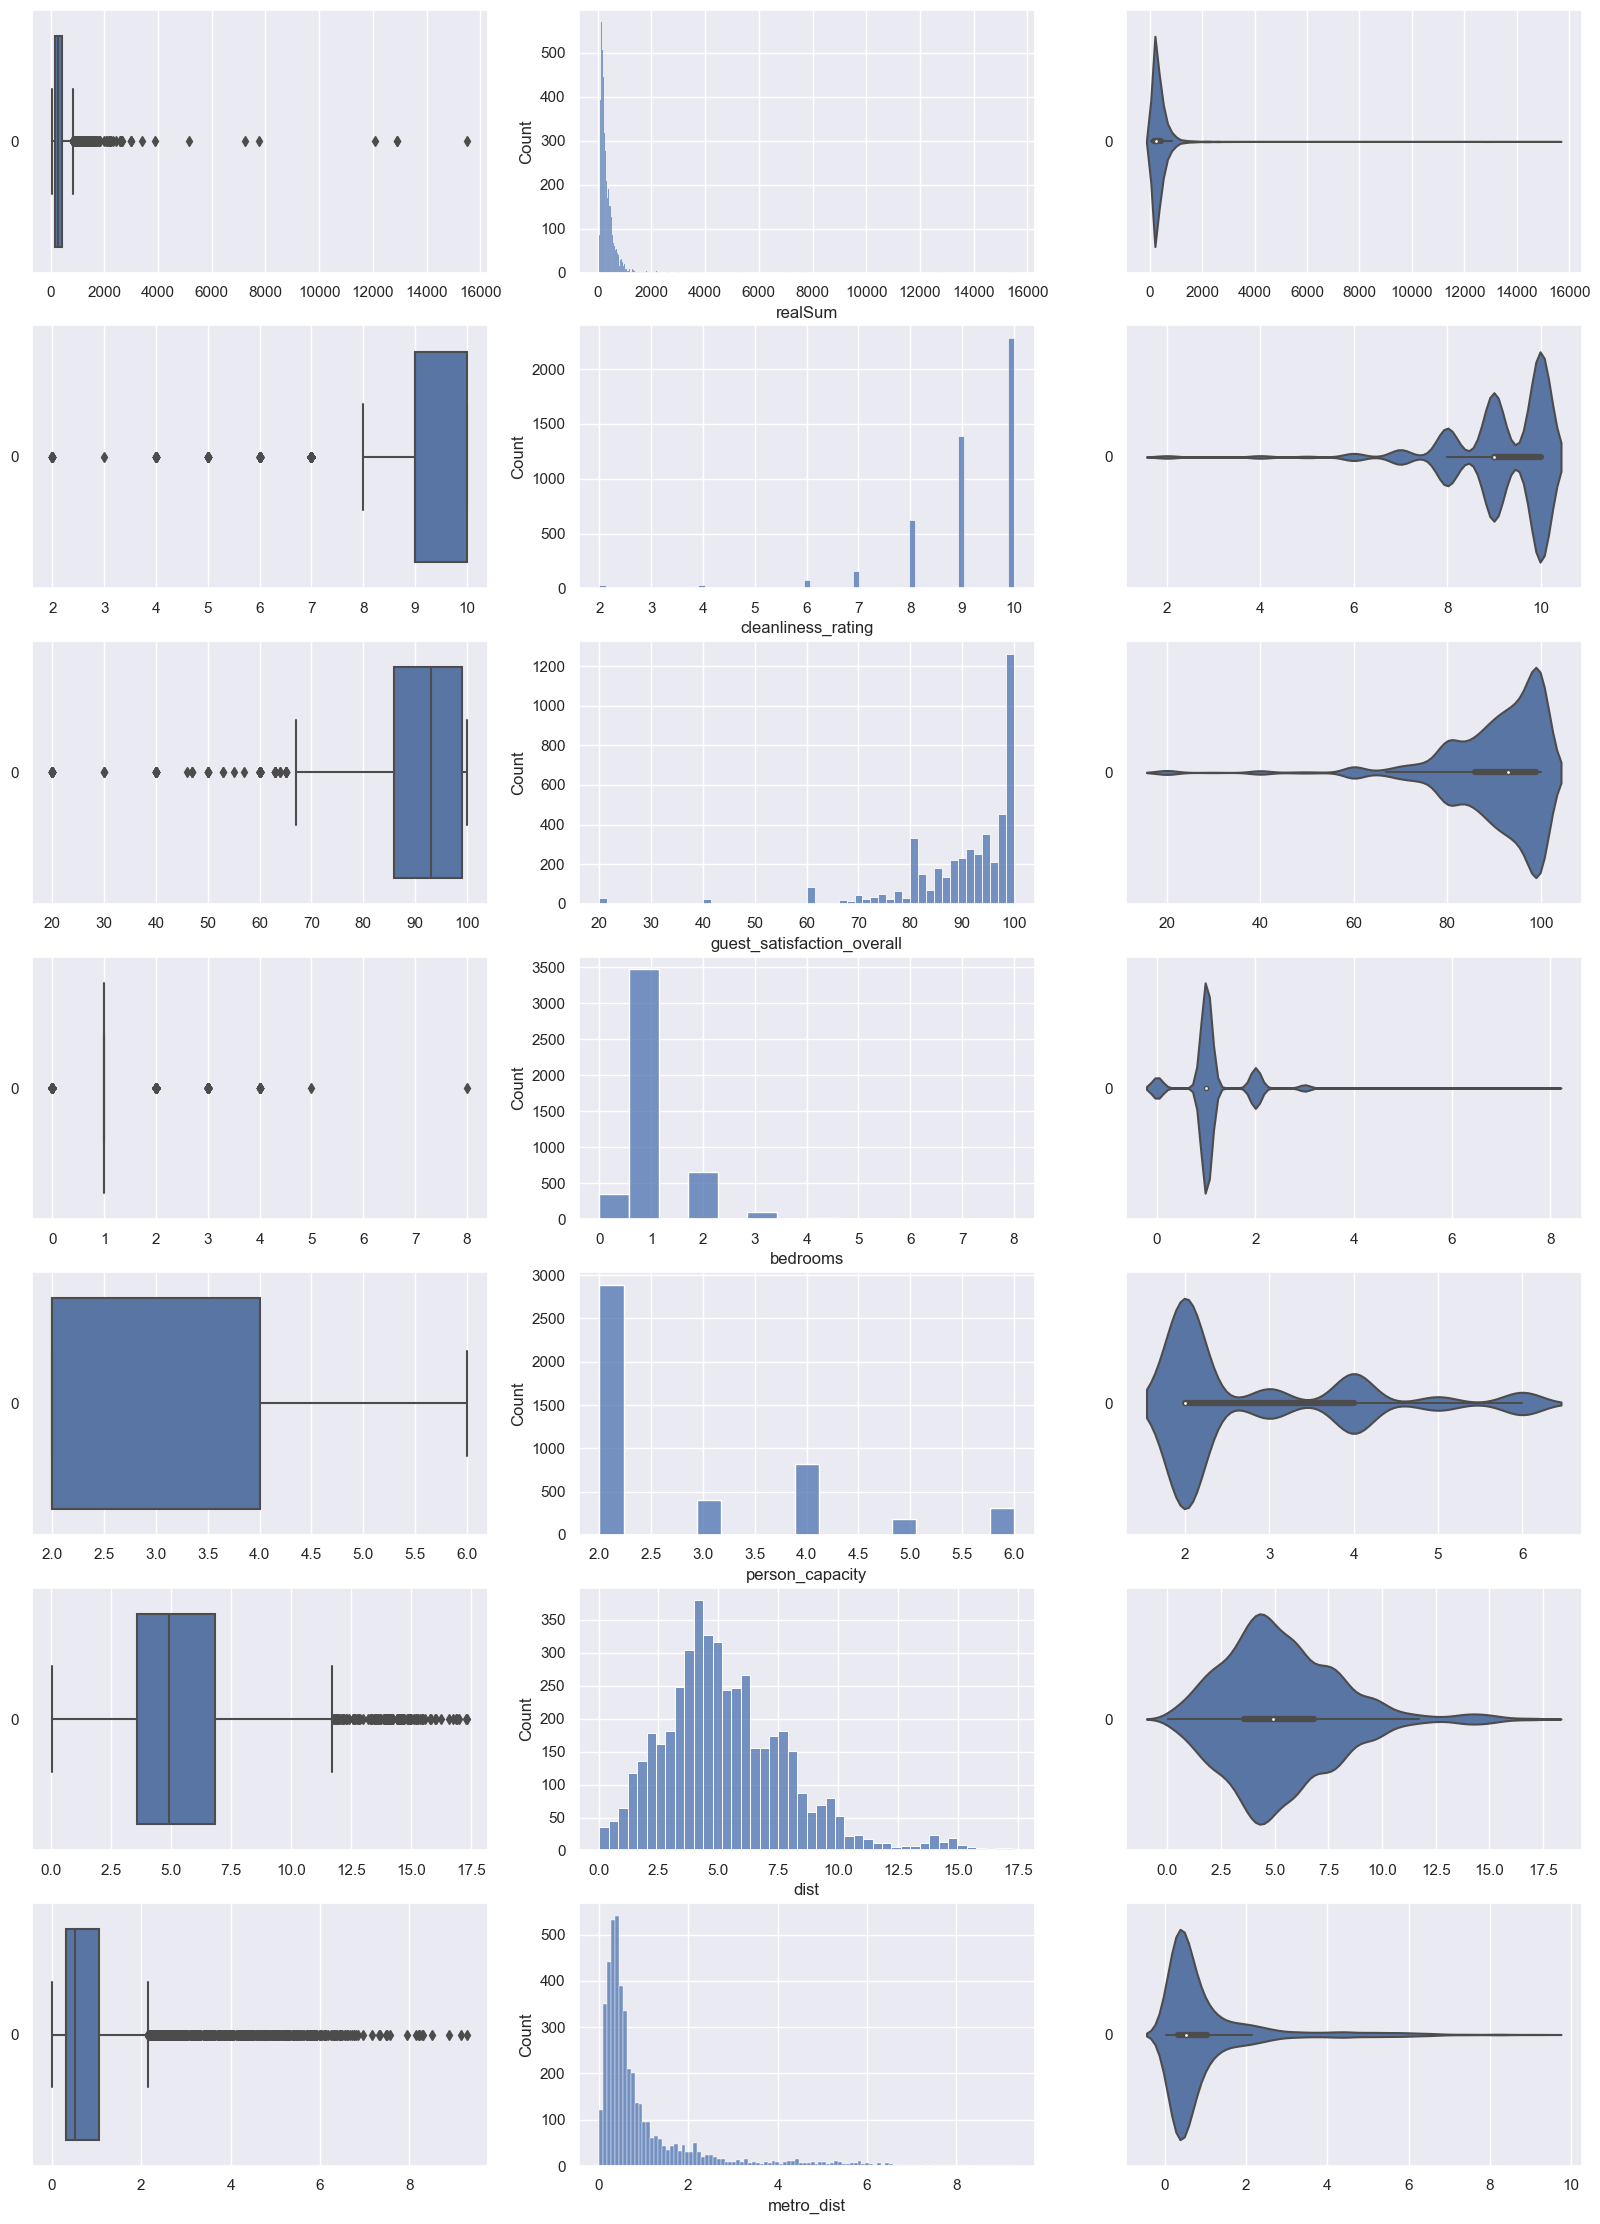

In [5]:
# Visualising the distributions of all variables
f, axes = plt.subplots(7, 3, figsize=(20, 28))

count = 0
for var in londonDataNumeric:
    sb.boxplot(data=londonDataNumeric[var], orient="h", ax=axes[count, 0])
    sb.histplot(data=londonDataNumeric[var], ax=axes[count, 1])
    sb.violinplot(data=londonDataNumeric[var], orient="h", ax=axes[count, 2])
    count += 1

In [6]:
# Calculate the quartiles
Q1 = londonDataNumeric.quantile(0.25)
Q3 = londonDataNumeric.quantile(0.75)

# Rule to identify outliers
rule = ((londonDataNumeric < (Q1 - 1.5 * (Q3 - Q1))) | (londonDataNumeric > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

realSum                        247
cleanliness_rating             309
guest_satisfaction_overall     176
bedrooms                      1136
person_capacity                  0
dist                           129
metro_dist                     531
dtype: int64

In comparison to the rome dataset, the london dataset contains more outliers for the following variables:  
- realSum
- cleanliness_rating
- dist
- metro_dist

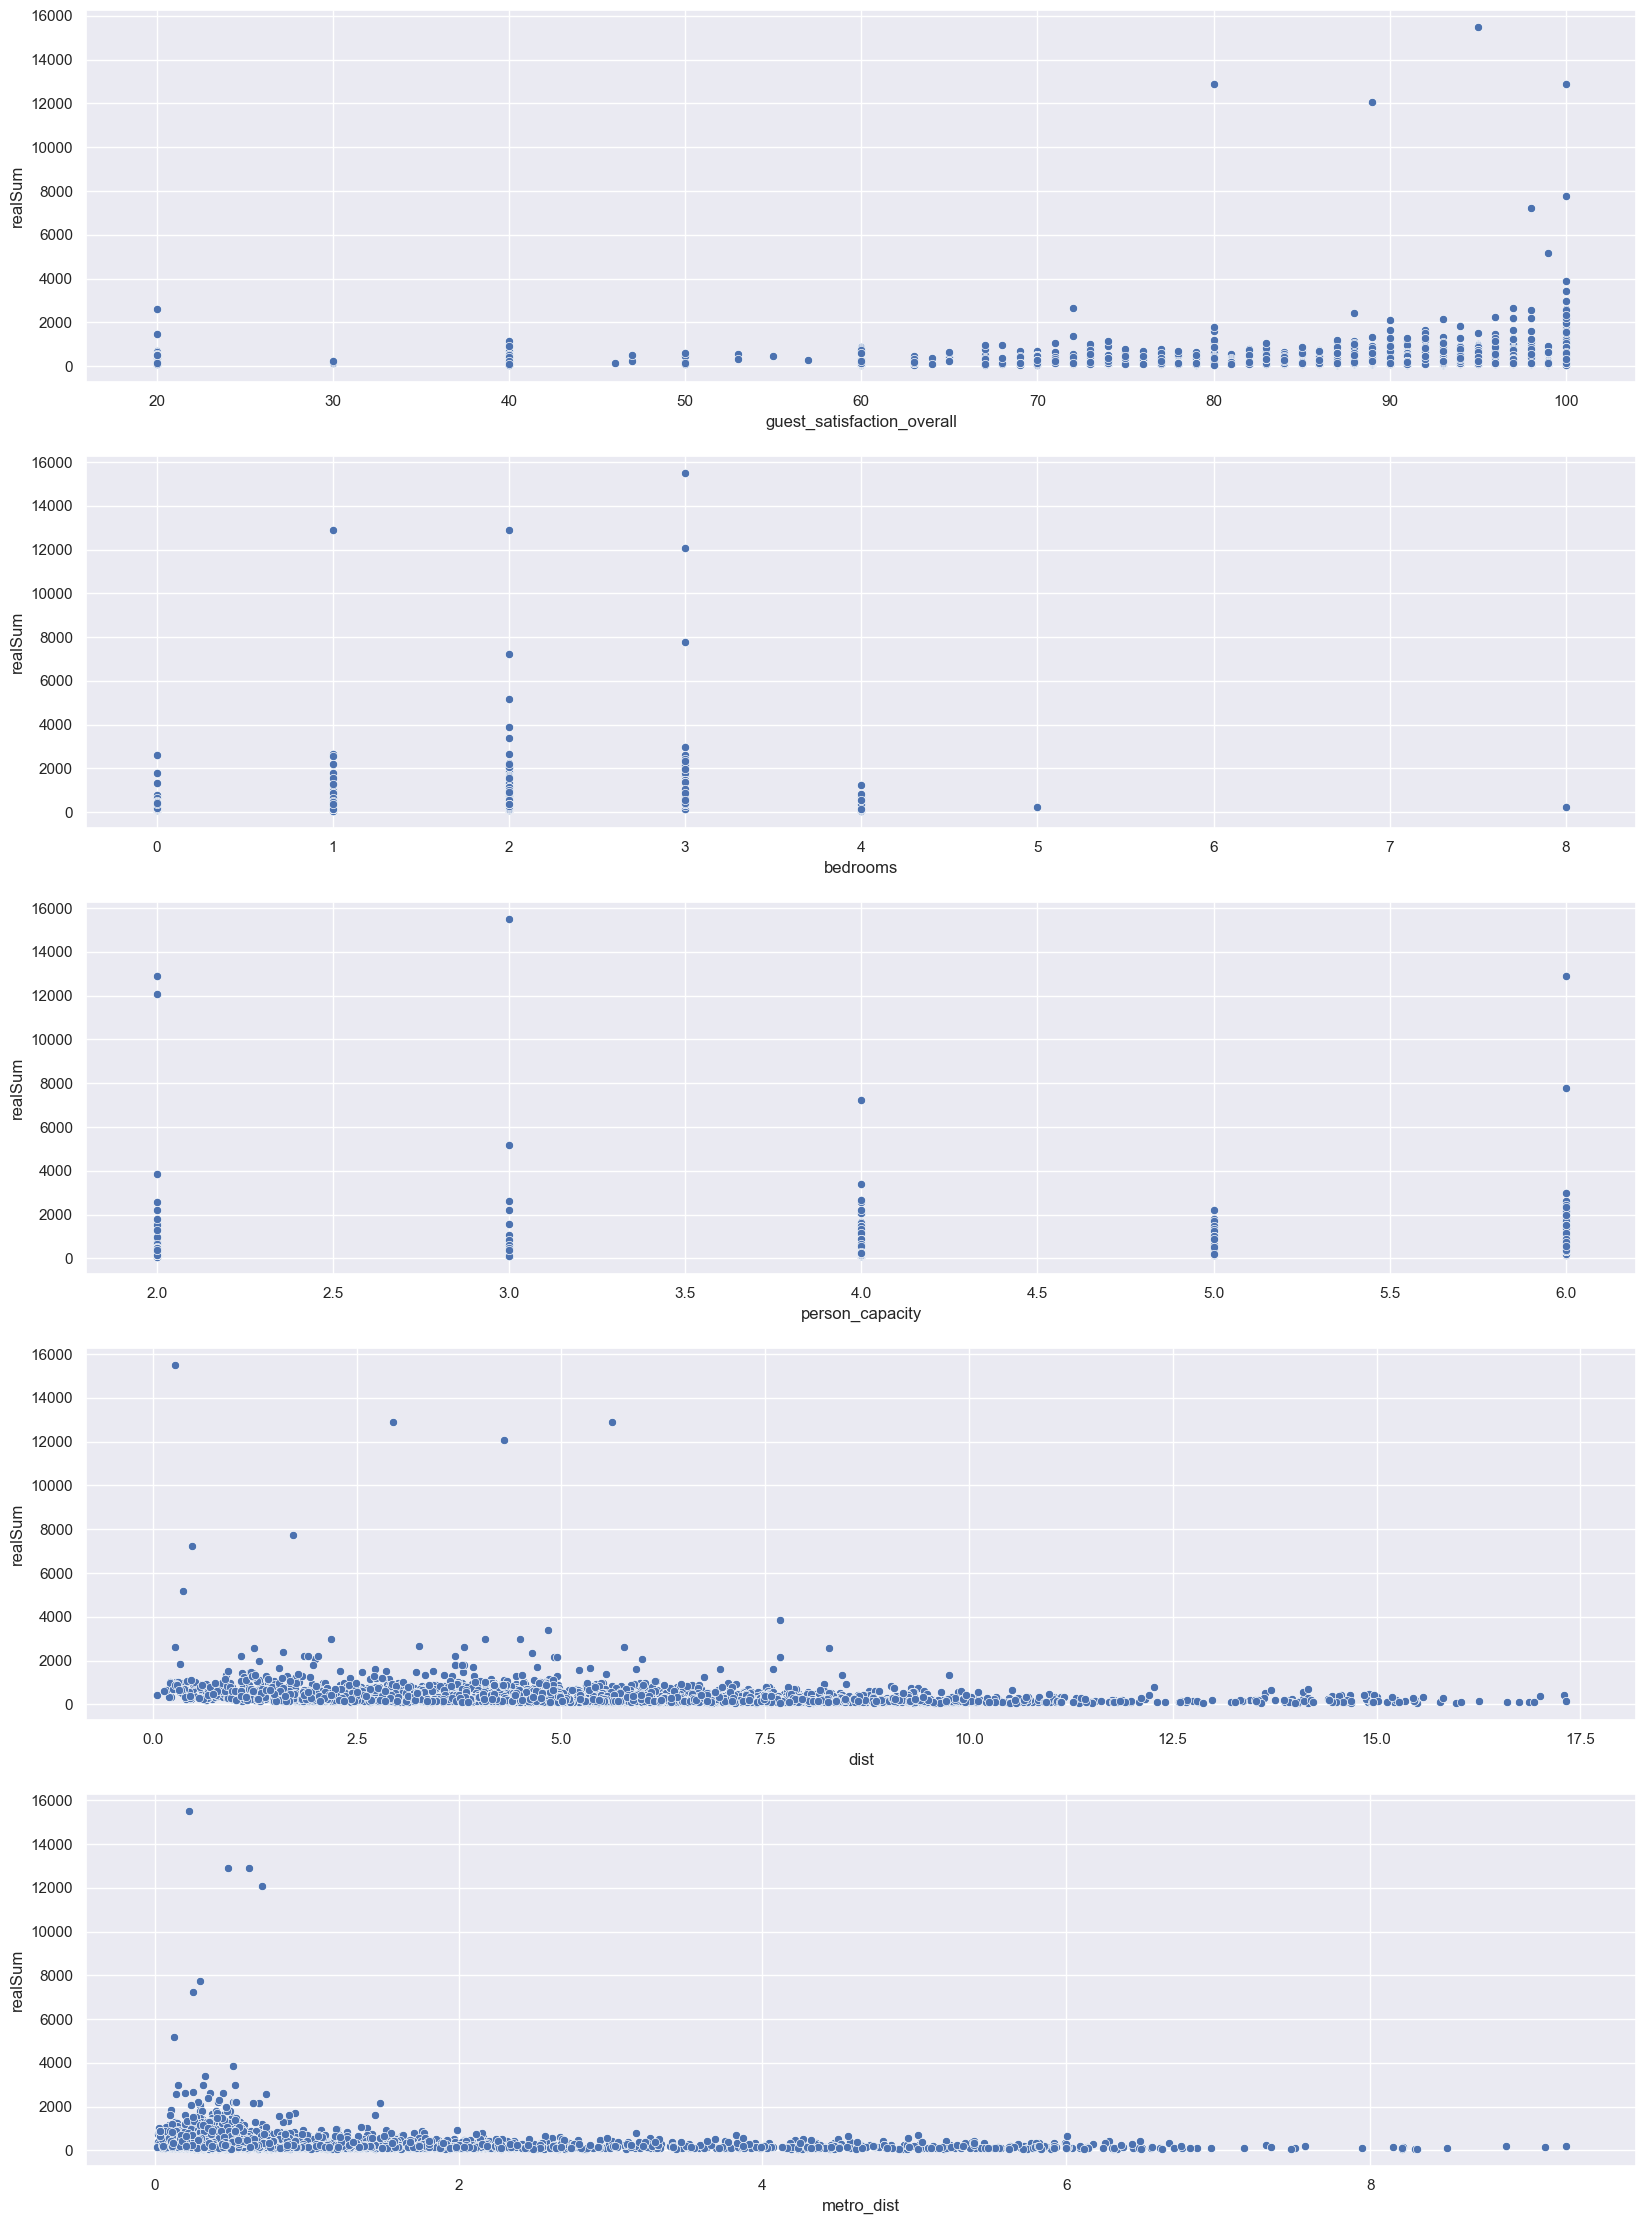

In [7]:
#Visualising realSum vs predictors
num_predictors = ['guest_satisfaction_overall',
                  'bedrooms','person_capacity', 'dist', 'metro_dist']

f, axes = plt.subplots(5, 1, figsize=(20, 28))

counter = 0
for var in num_predictors:
    sb.scatterplot(data = londonDataNumeric, x = var, y = 'realSum', ax = axes[counter])
    counter += 1

Similar to the rome dataset, there also doesn't seem to be any clear relationship between realSum (the price of Airbnbs in London) and the numeric predictors, so we again take a look at the correlation matrix using a heatmap.

<AxesSubplot:>

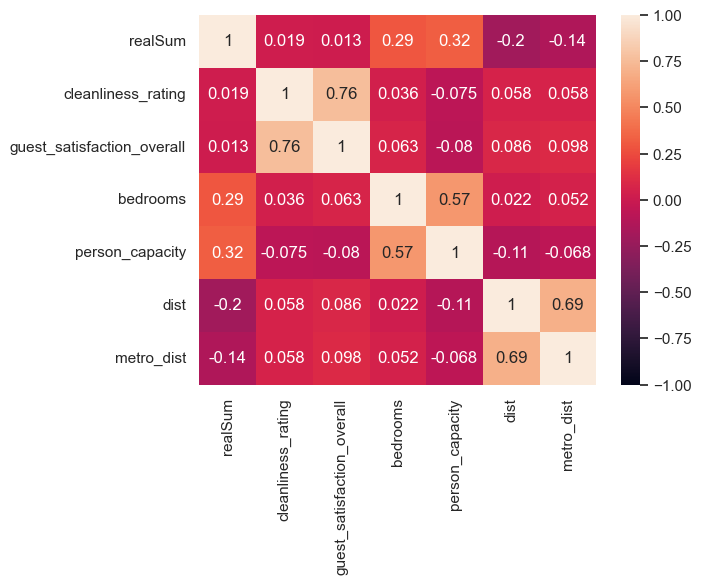

In [8]:
sb.heatmap(data = londonDataNumeric.corr(), vmin = -1, vmax = 1, annot = True)

As previously discussed, one of the dependent variables in the following pairs will be omitted due to their correlation with one another, which has been explained prior:
- **cleanliness_rating** and **guest_satisfaction_overall**
- **bedrooms** and **person_capacity**
- **dist** and **metro_dist**

We observe again that person_capacity has the strongest linear correlation with realSum, so we keep it as a numeric predictor for our model instead of bedrooms.    

Unlike the rome dataset, realSum here as a weaker correlation with guest_satisfaction_overall as compared to cleanliness_rating. However, since the difference between the two correlations is very small (0.006), we shall still keep guest_satisfaction_overall as the other numeric predictor

We keep dist instead of metro_dist again here as we see that it has a higher correlation with realSum. However, it should be noted that dist and metro_dist have a much higher correlation with each other for the London dataset, perhaps because London is generally more developed and accomodates more metro stations as compared to Rome.

## EDA for Categorical Data


In [9]:
cat_data = pd.DataFrame(londonData['room_type'])
cat_data.describe()

,room_type
count,4614
unique,3
top,Private room
freq,2625


In [10]:
cat_data.value_counts()

room_type      
Private room       2625
Entire home/apt    1966
Shared room          23
dtype: int64

In London the room_type with the highest frequency is private room  
In Rome the room_type with the highest frequency is entire home/apt 

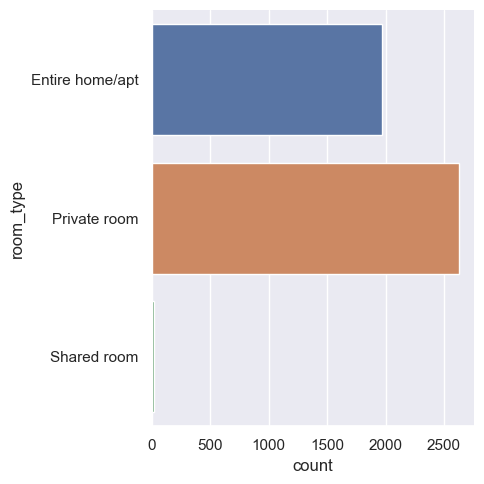

In [11]:
#Visualising the distribution

sb.catplot(data = cat_data, y = 'room_type', kind = 'count')

<AxesSubplot:xlabel='realSum', ylabel='room_type'>

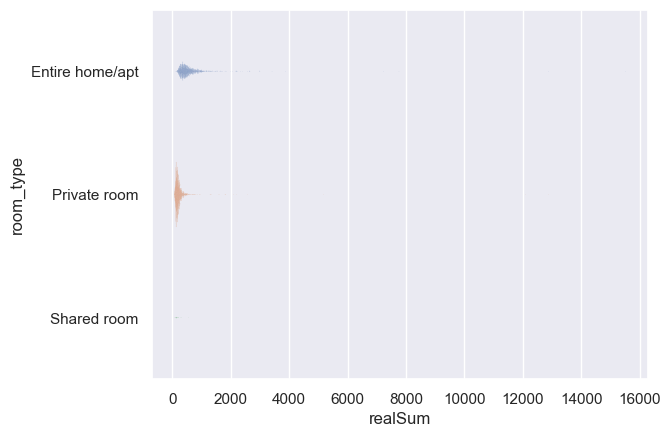

In [12]:
# Visualising against realSum
cat_data = pd.DataFrame(londonData[['realSum', 'room_type']])
sb.swarmplot(x="realSum", y = "room_type",data = cat_data, orient = "h", size = 0.2)

We do another plot for "Shared room" as it is barely visible

<AxesSubplot:xlabel='realSum', ylabel='room_type'>

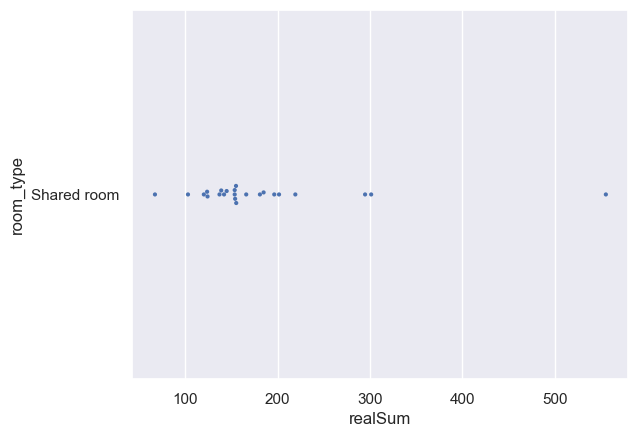

In [13]:
shared_room = pd.DataFrame(cat_data['room_type']  == 'Shared room')
shared_room = cat_data.drop(shared_room.index[(shared_room['room_type'] == False)])
sb.swarmplot(x="realSum", y = "room_type",data = shared_room, orient = "h", size = 3)

<AxesSubplot:xlabel='realSum', ylabel='room_type'>

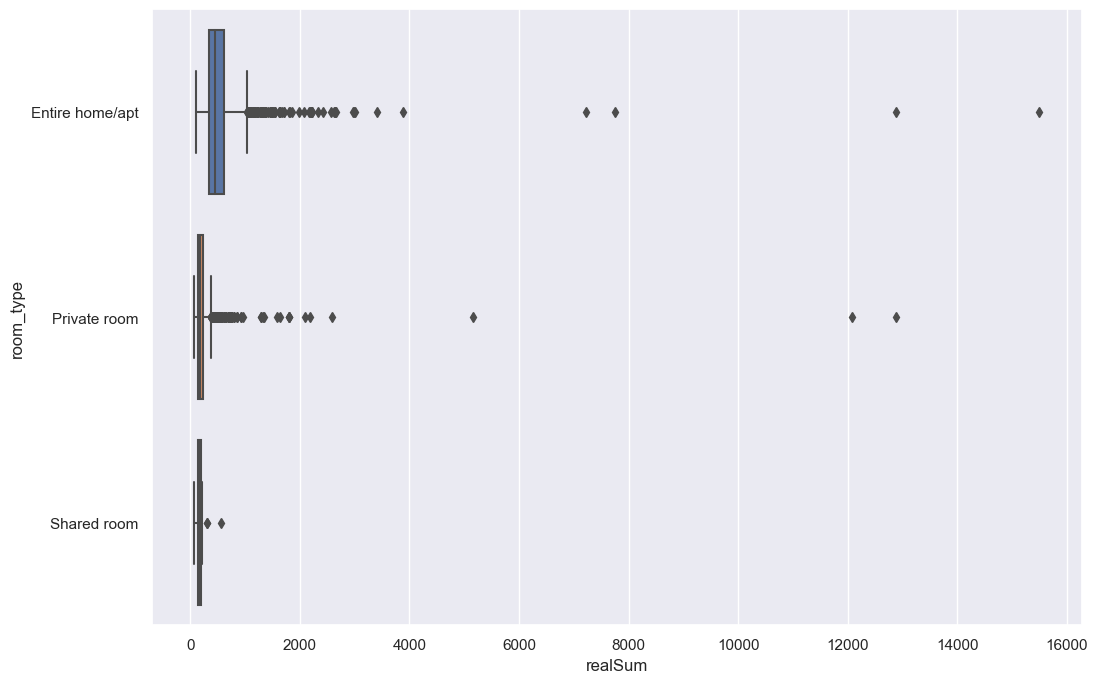

In [14]:
#visualing using boxplot
f = plt.figure(figsize = (12,8))
sb.boxplot(x="realSum", y = "room_type",data = cat_data, orient = "h")

While not very distinct, we can see a difference between the medians. The lowest is the shared room, followed by the private room and entire home/apt. While the amount of data for shared room is rather limited, the medians suggest a relationship that with realSum that seems logical. You would expect that having a room to yourself, rather than sharing, or even an entire home/apartment would be more valuable than a shared room. Thus, we will include the room_type in our model.

# Data Preparation

## Cleaning outliers

There is a need to remove the outliers from the data when generating our model. This is because their presence could affect the accuracy of our model.

In [15]:
#Taking only model data
model_predictors = ['guest_satisfaction_overall', 'person_capacity', 'dist', 'room_type']
model_variables = ['realSum', 'guest_satisfaction_overall', 'person_capacity', 'dist', 'room_type']
numeric_variables = ['realSum', 'guest_satisfaction_overall', 'person_capacity', 'dist']

model_data = pd.DataFrame(londonData[model_variables])

#functions for identifying and removing outliers
def find_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    outliers = (df > (q3 + 1.5 * IQR)).sum() + (df < (q1 - 1.5 * IQR)).sum()
    return outliers

def outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1

    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR

    ls = df.index[(df[col] < lower) | (df[col] > upper)]
    return ls


def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df


print(model_data.shape)
#Checking outliers for numeric data
max_outliers = 0
for var in numeric_variables:
    print(var)
    print("outliers: ", find_outliers(model_data[var]))
    max_outliers += find_outliers(model_data[var])
    
print("")
print("Max outliers: ", max_outliers)

(4614, 5)
realSum
outliers:  247
guest_satisfaction_overall
outliers:  176
person_capacity
outliers:  0
dist
outliers:  129

Max outliers:  552


Now we have an idea of how many outliers will be removed.

realSum outliers quite similar 

guest_satisfaction_overall much fewer outliers in London 

person_capacity for both is the same at 0 

dist outliers more in London

In [16]:
index_clearing = []
for column in numeric_variables:
    index_clearing.extend(outliers(model_data, column))

londonDataNumeric_cleaned = pd.DataFrame(remove(model_data, index_clearing))
print(model_data.shape)

(4614, 5)


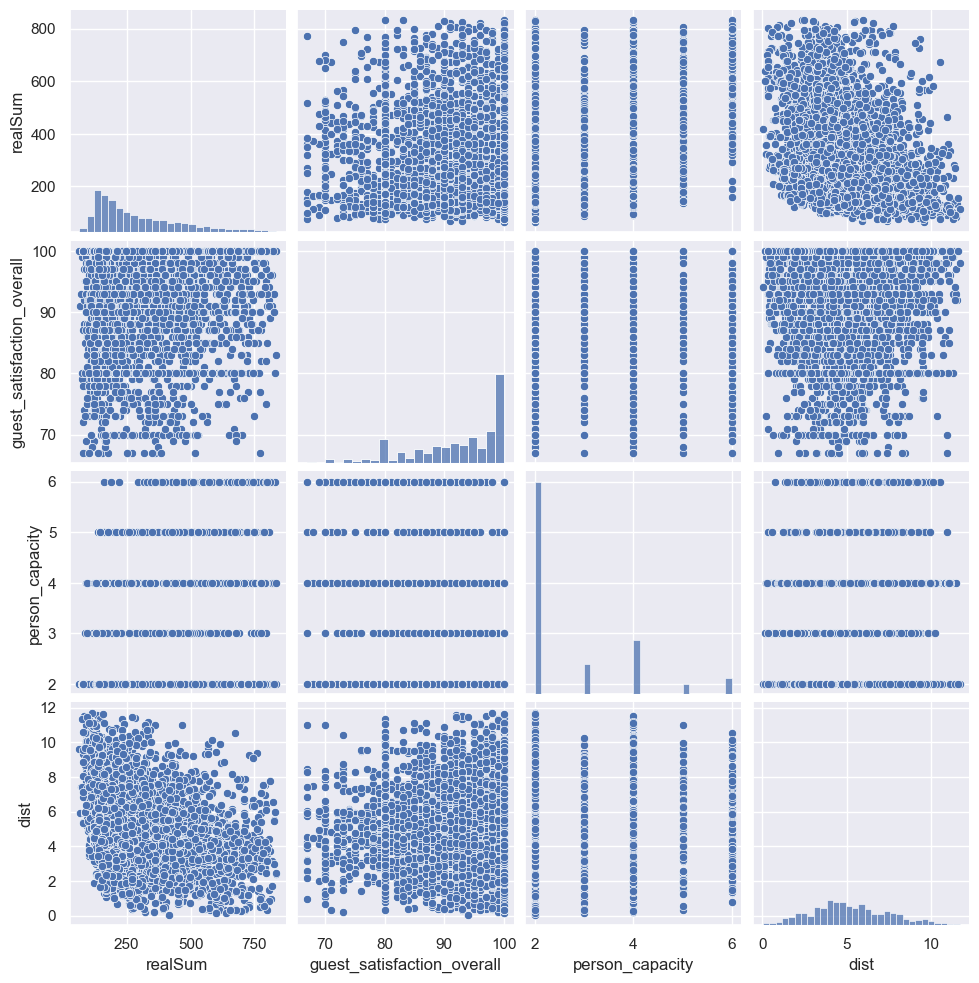

In [17]:
sb.pairplot(londonDataNumeric_cleaned)

<AxesSubplot:>

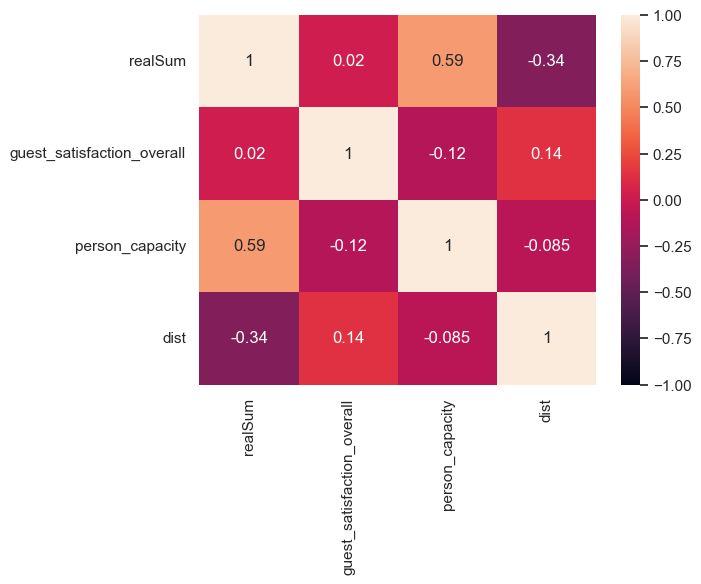

In [18]:
sb.heatmap(data = londonDataNumeric_cleaned.corr(), vmin = -1, vmax = 1, annot = True)

After cleaning, the linear correlation of all the variables has improved, we shall use this data to proceed with building the model

## One-Hot Encoding

Seeing how we are including room_type, a categorical datatype into our model, we need to encode the data. This is so that we can 
easily use the encoded version for regression. We shall accomplish this with one-hot encoding.

In [19]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
londonDataCat = pd.DataFrame(londonData['room_type'])
ohe.fit(londonDataCat)
londonDataCat_ohe = pd.DataFrame(ohe.transform(londonDataCat).toarray(),
                               columns=ohe.get_feature_names_out(londonDataCat.columns))

# Check the encoded variables
londonDataCat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   room_type_Entire home/apt  4614 non-null   float64
 1   room_type_Private room     4614 non-null   float64
 2   room_type_Shared room      4614 non-null   float64
dtypes: float64(3)
memory usage: 108.3 KB


The room_type has been one-hot encoded so we shall now combine it with the rest of the data

In [20]:
# Combining Numeric features with the OHE Categorical features

londonData_ohe = pd.concat([londonDataCat_ohe, londonDataNumeric_cleaned],
                         sort=False, axis=1).reindex(index=londonDataNumeric_cleaned.index)

# Check the final dataframe
londonData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4080 entries, 0 to 4613
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   room_type_Entire home/apt   4080 non-null   float64
 1   room_type_Private room      4080 non-null   float64
 2   room_type_Shared room       4080 non-null   float64
 3   realSum                     4080 non-null   float64
 4   guest_satisfaction_overall  4080 non-null   float64
 5   person_capacity             4080 non-null   float64
 6   dist                        4080 non-null   float64
 7   room_type                   4080 non-null   object 
dtypes: float64(7), object(1)
memory usage: 415.9+ KB


# Making a model

## Model 1: Multi-Variate Linear Regression

We shall try a basic linear regression model to predict realSum. 

In [21]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

In [22]:
londonData_ohe = londonData_ohe.sort_values(by='realSum')
londonData_ohe = londonData_ohe.drop(columns = 'room_type')

Here we split the data set into two with a ratio of 80:20 to create a test and a train set. The train set will be used to train the model. The test set will be used to see if our model performs well on data not found within the train set. With the two sets created, we fit a linear regression model to our train set.

In [23]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

londonData_vars = pd.DataFrame(londonData_ohe.drop(columns='realSum'))
# Extract Response and Predictors
y = pd.DataFrame(londonData_ohe['realSum'])
X = londonData_vars

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (3264, 6) (3264, 1)
Test Set  : (816, 6) (816, 1)


In [24]:
linreg.fit(X_train, y_train)

LinearRegression()

In [25]:
londonData_vars

,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,guest_satisfaction_overall,person_capacity,dist
2216,0.0,1.0,0.0,100.0,2.0,9.620320
645,0.0,0.0,1.0,91.0,2.0,5.930438
2130,0.0,1.0,0.0,93.0,2.0,7.396346
2991,0.0,1.0,0.0,79.0,2.0,7.381341
3026,0.0,1.0,0.0,80.0,2.0,7.393307
...,...,...,...,...,...,...
3988,1.0,0.0,0.0,90.0,2.0,2.975284
797,1.0,0.0,0.0,100.0,2.0,5.511701
3550,1.0,0.0,0.0,80.0,6.0,5.987721
3432,1.0,0.0,0.0,83.0,4.0,2.446781


In [26]:
pd.DataFrame(londonData_ohe['realSum'])

,realSum
2216,64.676968
645,67.264047
2130,69.851125
2991,74.790094
3026,74.790094
...,...
3988,827.630001
797,828.100379
3550,831.157835
3432,832.568969


In [27]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-11.06066895]
Coefficients 	: a =  [[124.30821323 -54.31447743 -69.9937358    2.77768909  47.33192269
  -17.6705656 ]]


Now we have fitted the model to our train set, taking a look at the coefficients give us an idea of the weight each predictor plays in influencing the realSum.

In [28]:
# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Explained Variance in simply the "Score"
print("Explained Variance (R^2) for train set \t:", linreg.score(X_train, y_train))
print("Explained Variance (R^2) for test set \t:", linreg.score(X_test, y_test))
print("")

# Compute MSE on the train and test set
print("Mean Squared Error (MSE) for train set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) for test set \t:", mean_squared_error(y_test, y_test_pred))
model_scores = {"Model": ["Linear Regression", "Linear Regression"], "Data Set": ["Train", "Test"], "Score": [linreg.score(X_train, y_train), linreg.score(X_test, y_test)]}
model_scores = pd.DataFrame(model_scores)

Explained Variance (R^2) for train set 	: 0.6450875630351054
Explained Variance (R^2) for test set 	: 0.6277396022494821

Mean Squared Error (MSE) for train set 	: 10036.157441372212
Mean Squared Error (MSE) for test set 	: 11288.475162984661


There is a significant difference in R^2 between Rome and London. 

London data (train=0.645, test=0.628) fits a multi variable linear regression model better than the Rome data(train=0.420, test=0.400). 

## Model 2: Random Forest Regression

Since regular linear regression doesn't work (likely because the relationship might not be fully explained linearly), we shall try random forest regression to model the relationship.

In [29]:
londonData_vars.info()
londonData_ohe['realSum'].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4080 entries, 2216 to 2394
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   room_type_Entire home/apt   4080 non-null   float64
 1   room_type_Private room      4080 non-null   float64
 2   room_type_Shared room       4080 non-null   float64
 3   guest_satisfaction_overall  4080 non-null   float64
 4   person_capacity             4080 non-null   float64
 5   dist                        4080 non-null   float64
dtypes: float64(6)
memory usage: 223.1 KB


count    4080.000000
mean      297.206232
std       169.394477
min        64.676968
25%       164.397093
50%       243.655777
75%       395.823044
max       833.274536
Name: realSum, dtype: float64

In [30]:
from sklearn.ensemble import RandomForestRegressor

y = pd.Series(londonData_ohe['realSum'])
X = pd.DataFrame(londonData_ohe.drop(columns='realSum'))

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a random forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=4)

# Perform cross-validation
scores = cross_val_score(regressor, X_train, y_train, cv=10)

# Print the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', np.mean(scores))

Cross-validation scores: [0.70200111 0.66270533 0.67738126 0.62581408 0.63997923 0.64721044
 0.58028941 0.65676324 0.62010612 0.68586901]
Mean cross-validation score: 0.6498119216385833


Higher cross-validation score for London Data (0.650) compared to Rome Data (0.438). 

In [31]:
from sklearn.metrics import r2_score

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Calculate the R^2 score for the training data
y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R^2 score for training data:", r2_train)

# Calculate the R^2 score for the test data
y_test_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 score for test data:", r2_test)

R^2 score for training data: 0.6705746369620449
R^2 score for test data: 0.6337930364769018


The R^2 results for random forest regression are consistent to multi variable linear regression. 

London Data performs better (train=0.671,test=0.634) compared to Rome Data (train=0.462,test=0.432). 

### Increase the number of Decision Trees in the Forest 

In [32]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.Series(londonData_ohe['realSum'])
X = pd.DataFrame(londonData_ohe.drop('realSum', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest object
regressor = RandomForestRegressor(n_estimators = 1000,  # CHANGE AND EXPERIMENT
                                 max_depth = 4)       # CHANGE AND EXPERIMENT

In [33]:
# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Calculate the R^2 score for the training data
y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R^2 score for training data:", r2_train)

# Calculate the R^2 score for the test data
y_test_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 score for test data:", r2_test)

R^2 score for training data: 0.6697250754618429
R^2 score for test data: 0.6343405027792739


### Increase the depth of the Decision Trees in the Forest 

In [34]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.Series(londonData_ohe['realSum'])
X = pd.DataFrame(londonData_ohe.drop('realSum', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest object
regressor = RandomForestRegressor(n_estimators = 100,  # CHANGE AND EXPERIMENT
                                 max_depth = 10,
                                random_state=0)       # CHANGE AND EXPERIMENT

In [35]:
# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Calculate the R^2 score for the training data
y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R^2 score for training data:", r2_train)

# Calculate the R^2 score for the test data
y_test_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 score for test data:", r2_test)

R^2 score for training data: 0.8317542355590416
R^2 score for test data: 0.6334659791574182


Similar to Rome Data, there is a great improvement on the train set but the test set score is still relatively low. This implies that increasing the max_depth over a certain threshold in random forest regression leads to overfitting. 

### Increase both the number of depths and decision trees 

In [36]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.Series(londonData_ohe['realSum'])
X = pd.DataFrame(londonData_ohe.drop('realSum', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest object
regressor = RandomForestRegressor(n_estimators = 1000,  # CHANGE AND EXPERIMENT
                                 max_depth = 10,
                                  random_state=0)       # CHANGE AND EXPERIMENT

In [37]:
# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Calculate the R^2 score for the training data
y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R^2 score for training data:", r2_train)

# Calculate the R^2 score for the test data
y_test_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 score for test data:", r2_test)

R^2 score for training data: 0.8321532458466361
R^2 score for test data: 0.6362415154983745


R^2 values for train and test sets appear to be unaffected after increasing both the number of depths and decision tress.The issue of overfitting still persists. 

### Cross validation 

In [ ]:
# Import RandomForestRegressor model from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Extract Response and Predictors
y = pd.DataFrame(londonData_ohe['realSum'])
X = pd.DataFrame(londonData_ohe.drop('realSum', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)



# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestRegressor(),               # the model family
                      param_grid,                            # the search grid
                      cv = 10,                               # 10-fold cross-validation
                      scoring = 'r2')                        # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.realSum.ravel())

In [ ]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

After performing cross-validation again here, we obtain the best parameters while preventing overfitting:

***max_depth*** = 5   
***n_estimators*** = 200

max_depth for London data is 5 compared to Rome data which is 6

n_estimators for London data significantly fewer at 200 compared to 900 for Rome data

In [38]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.Series(londonData_ohe['realSum'])
X = pd.DataFrame(londonData_ohe.drop('realSum', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest object
regressor = RandomForestRegressor(n_estimators = 200,   # BEST FROM GRIDSEARCH for OHE
                                  max_depth = 5,        # BEST FROM GRIDSEARCH for OHE
                                  random_state=0)        

In [39]:
# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Calculate the R^2 score for the training data
y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R^2 score for training data:", r2_train)

# Calculate the R^2 score for the test data
y_test_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 score for test data:", r2_test)
model_scores.loc[len(model_scores.index)] = ["Random Forest OHE", "Train", r2_train]
model_scores.loc[len(model_scores.index)] = ["Random Forest OHE", "Test", r2_test]

R^2 score for training data: 0.6930032032372135
R^2 score for test data: 0.6439833797797356


R^2 value for train data decreased from 0.832 to 0.693, however, the R^2 value for train and test data are more consistent now, 0.693 and 0.644 respectively. 

Likewise, the train and test data for Rome data is more consistent as well. 0.529 and 0.443

In [40]:
londonDataNumeric_cleaned.head()

,realSum,guest_satisfaction_overall,person_capacity,dist,room_type
0,570.098074,98.0,2.0,5.301018,Entire home/apt
1,297.984430,99.0,2.0,2.198946,Private room
2,336.790611,96.0,2.0,2.322958,Private room
3,226.722171,99.0,2.0,5.707825,Private room
4,256.355982,98.0,3.0,3.257945,Private room


## Trying Mean Target Encoding

In [41]:
londonData_TE = londonDataNumeric_cleaned.sort_values(by='realSum').reindex(index=londonDataNumeric_cleaned.index)

# Define the categorical variables and the target variable
categorical_variable = 'room_type'
target_variable = 'realSum'

# Create a new column with the mean target encoding for each category
mean_target = londonData_TE.groupby(categorical_variable)[target_variable].mean()
londonData_TE[f"{categorical_variable}_mean_target"] = londonData_TE[categorical_variable].map(mean_target)

# Print the first few rows of the new DataFrame
print(londonData_TE.head())

      realSum  guest_satisfaction_overall  person_capacity      dist  \
0  570.098074                        98.0              2.0  5.301018   
1  297.984430                        99.0              2.0  2.198946   
2  336.790611                        96.0              2.0  2.322958   
3  226.722171                        99.0              2.0  5.707825   
4  256.355982                        98.0              3.0  3.257945   

         room_type  room_type_mean_target  
0  Entire home/apt             446.673769  
1     Private room             200.169298  
2     Private room             200.169298  
3     Private room             200.169298  
4     Private room             200.169298  


In [42]:
londonData_TE = londonData_TE.drop(columns='room_type')
londonData_TE.head(n=20)

,realSum,guest_satisfaction_overall,person_capacity,dist,room_type_mean_target
0,570.098074,98.0,2.0,5.301018,446.673769
1,297.984430,99.0,2.0,2.198946,200.169298
2,336.790611,96.0,2.0,2.322958,200.169298
3,226.722171,99.0,2.0,5.707825,200.169298
4,256.355982,98.0,3.0,3.257945,200.169298
5,239.892754,100.0,2.0,5.085730,200.169298
6,324.090407,100.0,2.0,4.595055,200.169298
7,155.695101,95.0,2.0,5.102453,200.169298
8,129.353936,93.0,4.0,4.534041,200.169298
9,246.007667,74.0,3.0,3.746655,446.673769


### Random Forest Regression using Target encoding 

In [ ]:
# Import RandomForestRegressor model from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Extract Response and Predictors
y = pd.DataFrame(londonData_TE['realSum'])
X = pd.DataFrame(londonData_TE.drop('realSum', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)



# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestRegressor(),               # the model family
                      param_grid,                            # the search grid
                      cv = 10,                               # 10-fold cross-validation
                      scoring = 'r2')                        # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.realSum.ravel())

In [ ]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

Best parameters:

***max_depth*** = 6  
***n_estimators*** = 1000

In [43]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.Series(londonData_TE['realSum'])
X = pd.DataFrame(londonData_TE.drop('realSum', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest object
regressor = RandomForestRegressor(n_estimators = 1000,  # BEST FROM GRIDSEARCH for TE
                                 max_depth = 6,         # BEST FROM GRIDSEARCH for TE
                                  random_state=0)        

In [44]:
# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Calculate the R^2 score for the training data
y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R^2 score for training data:", r2_train)

# Calculate the R^2 score for the test data
y_test_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 score for test data:", r2_test)
model_scores.loc[len(model_scores.index)] = ["Random Forest MTE", "Train", r2_train]
model_scores.loc[len(model_scores.index)] = ["Random Forest MTE", "Test", r2_test]

R^2 score for training data: 0.7233410253330463
R^2 score for test data: 0.6246906814553177


Similar to Rome data, the model for London data did slightly better using target encoding. 
Train for mean target encoding 0.723 
Train for one hot encoding 0.693 

Test for mean target encoding 0.625
Test for one hot encoding 0.644 

# Neural Network Regression

### One Hot Encoding

In [45]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.Series(londonData_ohe['realSum'])
X = pd.DataFrame(londonData_ohe.drop('realSum', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Import MLPRegressor model from Scikit-Learn.neural_network
from sklearn.neural_network import MLPRegressor

# Create the Random Forest object
regressor = MLPRegressor(max_iter=1000, random_state=0)

In [46]:
# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Calculate the R^2 score for the training data
y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R^2 score for training data:", r2_train)

# Calculate the R^2 score for the test data
y_test_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 score for test data:", r2_test)

R^2 score for training data: 0.6558891691376988
R^2 score for test data: 0.6350013171601319


### Mean Target Encoding

In [47]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.Series(londonData_ohe['realSum'])
X = pd.DataFrame(londonData_ohe.drop('realSum', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# Import MLPRegressor model from Scikit-Learn.neural_network
from sklearn.neural_network import MLPRegressor

# Create the Neural Network Regression object
regressor = MLPRegressor(max_iter=1000, random_state=0)

In [48]:
# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Calculate the R^2 score for the training data
y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R^2 score for training data:", r2_train)

# Calculate the R^2 score for the test data
y_test_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 score for test data:", r2_test)

R^2 score for training data: 0.6558891691376988
R^2 score for test data: 0.6350013171601319


### GridSearchCV One Hot Encoding

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Extract Response and Predictors
y = pd.DataFrame(londonData_ohe['realSum'])
X = pd.DataFrame(londonData_ohe.drop('realSum', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the Hyper-parameter Grid to search on
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000, 3000],
    'solver': ['adam', 'lbfgs'],
    'learning_rate': ['constant', 'adaptive']
}

# Create the GridSearchCV object
hpGrid = GridSearchCV(
    MLPRegressor(),
    param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)

# Fit the grid search object to the training data
hpGrid.fit(X_train, y_train.values.ravel())

# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

Best parameters:

***alpha*** = 0.01  
***max_iter*** = 3000  
***solver*** = 'lbfgs'

In [49]:
# Set MLPRegressor parameters according to CV results 
regressor = MLPRegressor(alpha=0.01, max_iter=3000, solver='lbfgs', random_state=0)

regressor.fit(X_train, y_train.values.ravel())

# Calculate the R^2 score for the training data
y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R^2 score for training data:", r2_train)

# Calculate the R^2 score for the test data
y_test_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 score for test data:", r2_test)
model_scores.loc[len(model_scores.index)] = ["Neural Network OHE", "Train", r2_train]
model_scores.loc[len(model_scores.index)] = ["Neural Network OHE", "Test", r2_test]

R^2 score for training data: 0.666767371759671
R^2 score for test data: 0.6457395098693981


### GridSearchCV Mean Target Encoding

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Extract Response and Predictors
y = pd.DataFrame(londonData_TE['realSum'])
X = pd.DataFrame(londonData_TE.drop('realSum', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the Hyper-parameter Grid to search on
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000, 3000],
    'solver': ['adam', 'lbfgs'],
    'learning_rate': ['constant', 'adaptive']
}

# Create the GridSearchCV object
hpGrid = GridSearchCV(
    MLPRegressor(),
    param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)

# Fit the grid search object to the training data
hpGrid.fit(X_train, y_train.values.ravel())

# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

Best parameters:

***alpha*** = 0.001  
***max_iter*** = 3000  
***solver*** = 'lbfgs'

In [50]:
# Set MLPRegressor parameters according to CV results 
regressor = MLPRegressor(alpha=0.001, max_iter=3000, solver='lbfgs', random_state=0)

regressor.fit(X_train, y_train.values.ravel())

# Calculate the R^2 score for the training data
y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R^2 score for training data:", r2_train)

# Calculate the R^2 score for the test data
y_test_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 score for test data:", r2_test)
model_scores.loc[len(model_scores.index)] = ["Neural Network MTE", "Train", r2_train]
model_scores.loc[len(model_scores.index)] = ["Neural Network MTE", "Test", r2_test]

R^2 score for training data: 0.664495402913881
R^2 score for test data: 0.6440755598291552


# Summary

Here is a summary of the results of our models.

## Train Scores Comparision Across Models

<AxesSubplot:xlabel='Score', ylabel='Model'>

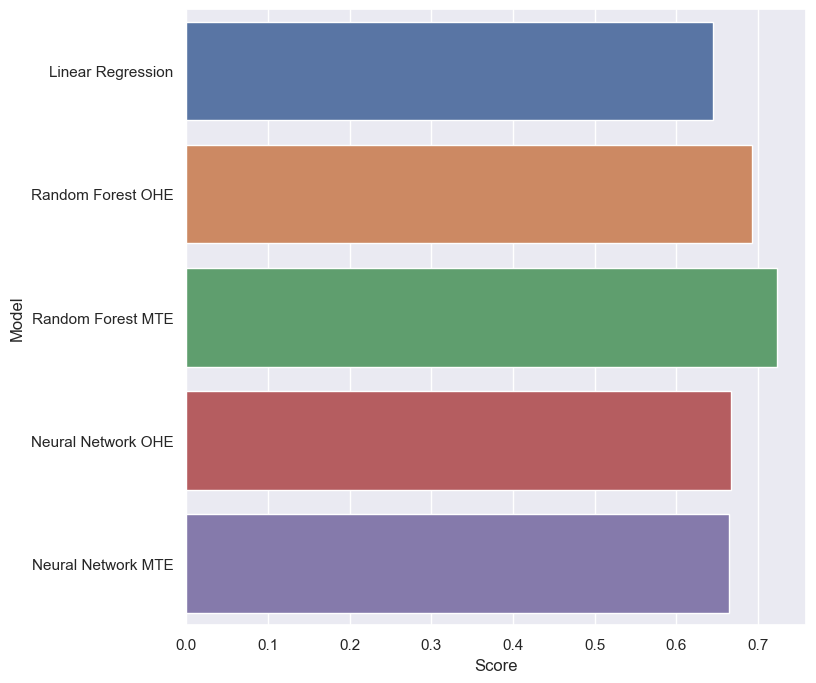

In [51]:
## Showing all train scores
ls = model_scores.index[model_scores["Data Set"] == "Test"]
ls = sorted(set(ls))

train_scores = model_scores.drop(ls)

f = plt.figure(figsize = (8,8))

sb.barplot(data = train_scores, x = "Score" , y = "Model", orient = "h")

Similar to what is observed in the Rome dataset, the R^2 score for Random Forest is higher than the others showing that it performs better.

## Test Scores Comparision Across Models

<AxesSubplot:xlabel='Score', ylabel='Model'>

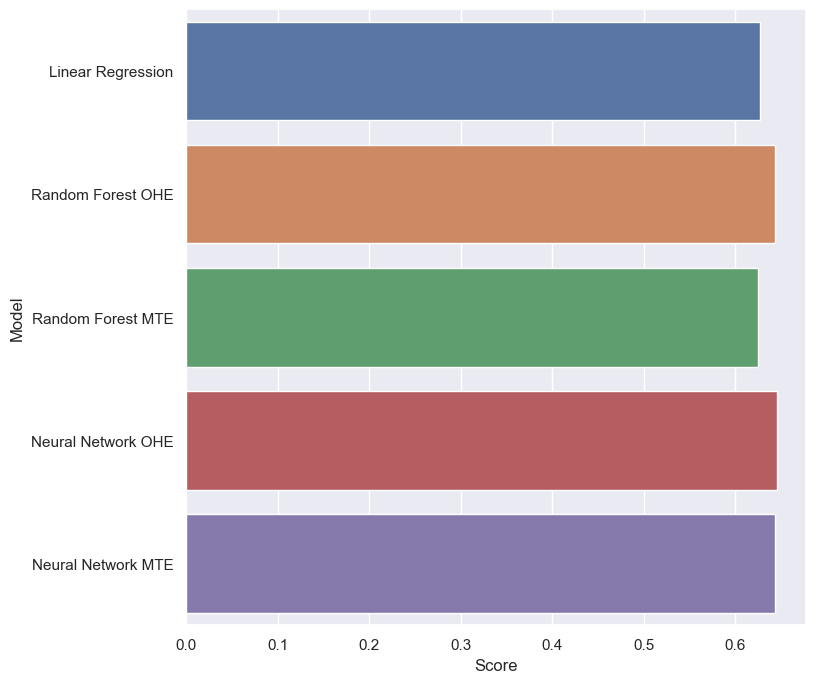

In [52]:
## Showing all test scores
ls = model_scores.index[model_scores["Data Set"] == "Train"]
ls = sorted(set(ls))

test_scores = model_scores.drop(ls)

f = plt.figure(figsize = (8,8))
sb.barplot(data = test_scores, x = "Score" , y = "Model", orient = "h")

From here, we can see that the R^2 score on the test set is roughly the same across the models meaning they all performed similarly on the test set.

## Comparing Train vs Test per Model

<AxesSubplot:xlabel='Score', ylabel='Model'>

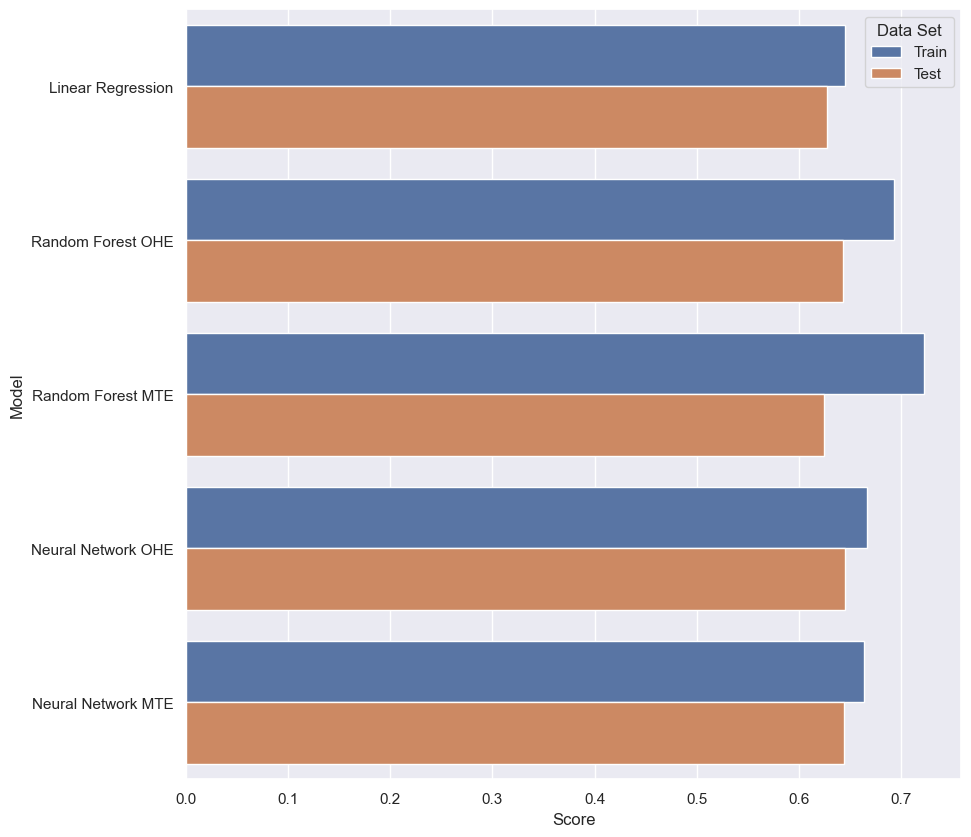

In [53]:
f = plt.figure(figsize = (10,10))
sb.barplot(data = model_scores, x = "Score" , y = "Model", hue = "Data Set", orient = "h")

Here, we see that Random Forest has the largest difference between train and test scores even though it the difference has been minimised using Cross Validation. Furthermore, the Random Forest models have the highest scores overall. The Neural Network models are more consistent and more accurate than the basic Linear Regression model. This is similar to what was observed in the Rome dataset.

Overall, the trend of the R^2 score is similar to what is observed in the Rome dataset. The difference in the trend is firstly, the models all performed better (max 0.7233) compared to for Rome (max 0.5294). Secondly, the models all performed similarly for the test set data. The improved accuracy of the models suggest that the relationship between the predictors and realSum is more linear in London compared to Rome. However, the R^2 score still is not very high and so there could be more factors affecting realSum.

However, seeing how tourists will have access to all available listings and will only consider the currently available ones, there is no need for the model to accurately predict listings that are not available to be useful for a tourist. Therefore, it is possible to recommend training a Random Forest model on all available listings to give an estimate on what is a fair price to pay for the given listing's features based on the predictions generated from the model.  

That being said, if we are more interested in predicting the price more accurately and with more certainty when given new listings, further investigations shall be required. A suggested approach could be to investigate spatial econometrics.
